# Homework Set 3

Julius Wantenaar 11339055
Sebastiaan Bye 14084880

In [1]:
import math
import numpy as np
import scipy.linalg as la
import matplotlib.pyplot as plt

-----
# Exercise 1

# (a)
We have the table of data in the next cell.

Using `numpy.linalg.lstsq()`, fit a straight line, a quadratic function, and a cubic function to these data. Plot the data and your fitted functions in a graph. It is **not** allowed to use numpy.polyfit, but you may have a look at the documentation to see some examples.

In [2]:
t = np.array([3, 11, 29, 32, 47, 63, 73, 99])
w = np.array([74, 72, 52, 35, 37, 20, 19, 19])

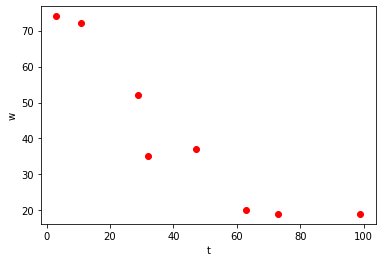

In [3]:
# This plots the points
plt.plot(t,w, 'ro')
plt.xlabel("t")
plt.ylabel("w")
plt.show()

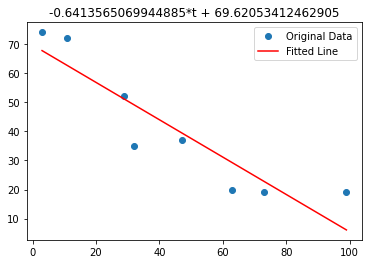

In [4]:
# This uses least squares to fit a line through the data point
A = np.vstack([t, np.ones(len(t))]).T
m_line, c_line = np.linalg.lstsq(A,w, rcond=None)[0]

plt.plot(t,w, 'o', label='Original Data')
plt.plot(t, m_line * t + c_line, 'r', label = 'Fitted Line')
plt.title(f"{m_line}*t + {c_line}")
plt.legend()
plt.show()

In [5]:
# This solves for the quadratic formula
A = np.vstack([t**2,t,np.ones(len(t))]).T
q1, q2, q3 = np.linalg.lstsq(A,w, rcond=None)[0]

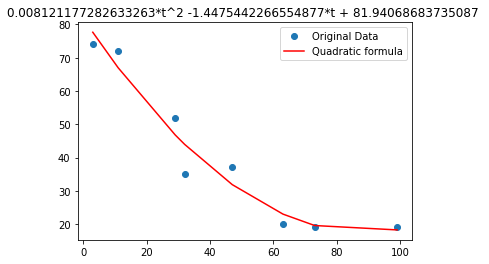

In [6]:
# This uses least squares to cubic polynomial through the data point
plt.plot(t,w, 'o', label='Original Data')
plt.plot(t, (q1 * t**2) + (q2* t) + q3, 'r', label = 'Quadratic formula')
plt.title(f"{q1}*t^{2} {q2}*t + {q3} ")
plt.legend()
plt.show()

In [7]:
# This solves for the cubic function
A = np.vstack([t**3,t**2,t,np.ones(len(t))]).T
c1, c2, c3, c4 = np.linalg.lstsq(A,w, rcond=None)[0]

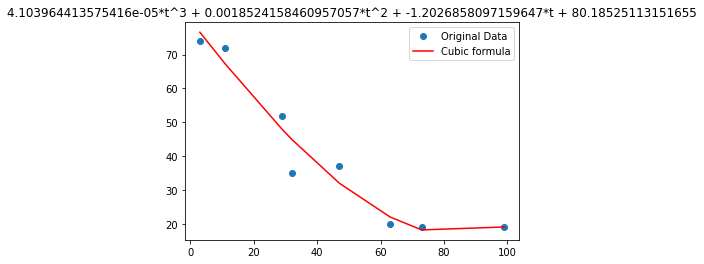

In [8]:
# This plots the qubic function
plt.plot(t,w, 'o', label='Original Data')
plt.plot(t, (c1*t**3)+(c2 * t**2) + (c3* t) + c4, 'r', label = 'Cubic formula')
plt.title(f"{c1}*t^{3} + {c2}*t^{2} + {c3}*t + {c4}")
plt.legend()
plt.show()

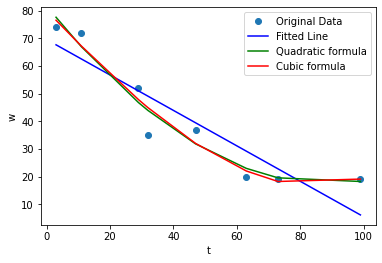

In [9]:
# This puts everything into one figure
plt.plot(t,w, 'o', label='Original Data')
plt.plot(t, m_line * t + c_line, 'b', label = 'Fitted Line')
plt.plot(t, (q1 * t**2) + (q2* t) + q3, 'g', label = 'Quadratic formula')
plt.plot(t, (c1*t**3)+(c2 * t**2) + (c3* t) + c4, 'r', label = 'Cubic formula')
plt.legend()
plt.xlabel("t")
plt.ylabel("w")
plt.show()

The above figure plots the original data points, the fitted line, the fitted quadratic formula and fitted cubic formula. 

The formula for the fitted line using the least squares method is $f(t) = -0.641 t + 69.620 $

The formula for the quadratic function using the least squares method is $f(t) = 0.008 t^{2} - 1.448 t + 81.941 $

The formula for the cubic function using the least squares method is $f(t) = 4.104t^{3} + 0.002 t^{2} - 1.203 t + 80.185 $

-----
# Exercise 2
We want to reconstruct a function $s(t)$ (also called the signal in this exercise), $t \in [0,1]$, from data given by
$$d(t) = \int_0^1 s(t) \, dt + \text{noise}.$$
We assume the data is given at $n$ equally space time points $t_j = j h$, $h = \frac{1}{n}$, $j=1,2, \ldots, n$. The data is therefore a vector $d = [d_1, \ldots, d_n]$, where $d_j$ denotes the value at $t_j$. 
The signal $s$ is to be reconstructed at time points 
$t_{j-1/2} = (j-1/2)h$ for $j = 1,2, \ldots, n$. It is described by a vector $s = [s_1, \ldots, s_n]$ with $s_j$ the value at $t_{j-1/2}$.
Numerical integration is described in Chapter 8 of the book by Heath. Using the composite midpoint rule, the vectors $s$ and $d$ are related by
$$d = A \cdot s + \text{noise}$$
where
$$A = \begin{bmatrix} 
h & 0 & 0 & \ldots & 0 \\
h & h & 0 & \ldots & 0 \\
h & h & h & \ddots &  \vdots \\
\vdots & \vdots & \ddots & \ddots & 0 \\
h & h & \ldots & h  & h 
\end{bmatrix}.$$


## (a)
As a test signal we take
$$s_{\rm true}(t) = \left\{
\begin{array}{ll} 1 & \text{if $|t-1/2|<0.15$}\\
0 & \text{otherwise} \end{array} 
\right. .$$ 
Generate data $d_0$ without noise and data $d_\epsilon$ with noise, where the noise is normally distributed, with mean zero and standard deviation $\epsilon = 0.005$.
Take for example $n=100$. Plot the data.

In [10]:
# This generates the time steps
tj = []
n = 100
for j in range(1, n + 1):
    tj.append(j*1/n)

In [11]:
# This generates s without noise
s_nonoise = []

for i in tj:
    if (abs(i - 0.5)) < 0.15:
        s_nonoise.append([1])
    else:
        s_nonoise.append([0])
        
s_noise = s_nonoise

In [29]:
# Calculate A*s
A = np.full((n,n), 1/n)
A = np.tril(A)

d0 = np.matmul(A, s_nonoise)
de = np.matmul(A, s_noise)

In [13]:
# Add noise to A*s
for i in range(len(de)):
    de[i] = de[i] + np.random.normal(0, 0.005)

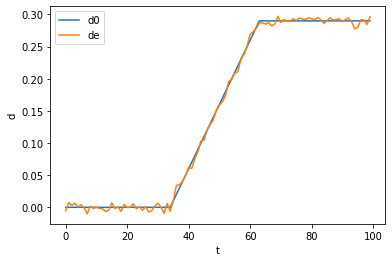

In [14]:
# This plots d0 and de
plt.plot(d0, label= "d0")
plt.plot(de, label="de")
plt.legend()
plt.xlabel("t")
plt.ylabel("d")
plt.show()

The above plot shows $d_{0}$ and $d_{e}$ which are generated by $A*s$. The result of $d_{e}$ clearly has a noise term as there are stochastics pertubations away from the expected values.

## (b)
Try to determine $s$ from $d_0$ by inverting the matrix $A$, ignoring the noise term.
Do the same with $d_\epsilon$ instead of $d_0$. Plot the results. What do you observe about the errors in the inversion?

In [15]:
# This calculates s0 and se by inverting the matrix a
s0_results = np.matmul(np.linalg.inv(A),d0)
se_results = np.matmul(np.linalg.inv(A),de)

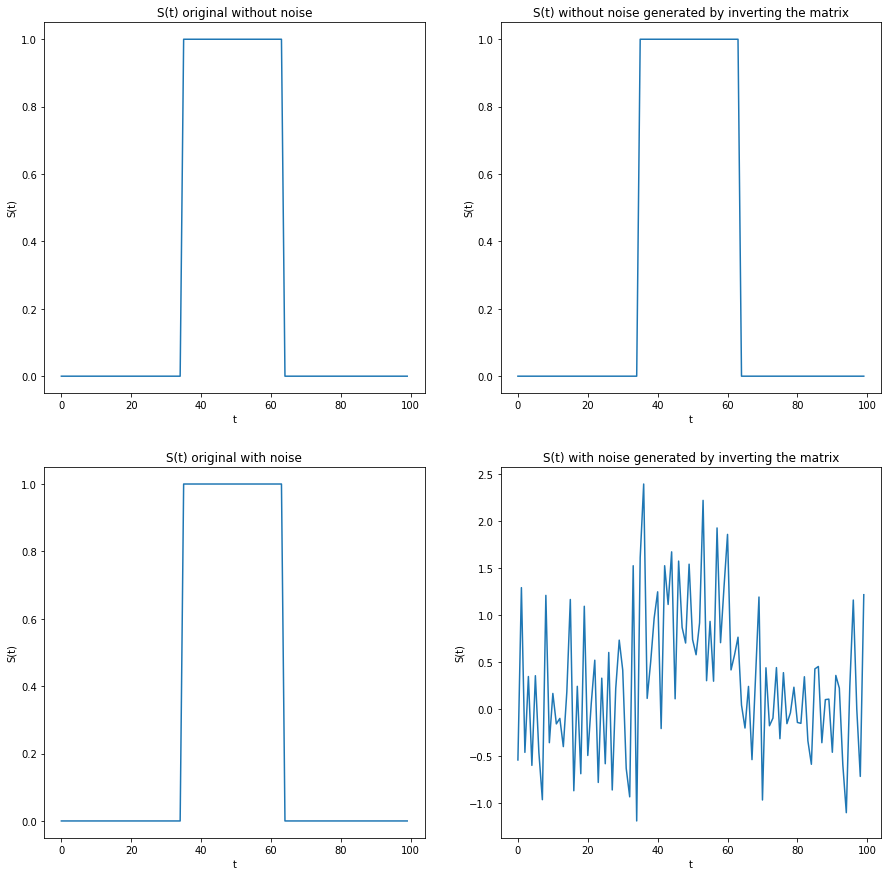

In [16]:
# This plots the results for no noise
fig, axs = plt.subplots(2,2, figsize = ((15,15)))

# No noise
axs[0,0].plot(s_nonoise)
axs[0,0].set_title("S(t) original without noise")
axs[0,0].set_xlabel("t")
axs[0,0].set_ylabel("S(t)")

axs[0,1].plot(s0_results)
axs[0,1].set_title("S(t) without noise generated by inverting the matrix")
axs[0,1].set_xlabel("t")
axs[0,1].set_ylabel("S(t)")

# Noise
axs[1,0].plot(s_noise)
axs[1,0].set_title("S(t) original with noise")
axs[1,0].set_xlabel("t")
axs[1,0].set_ylabel("S(t)")

axs[1,1].plot(se_results)
axs[1,1].set_title("S(t) with noise generated by inverting the matrix")
axs[1,1].set_xlabel("t")
axs[1,1].set_ylabel("S(t)")

plt.show()

The errors that are 

## (c)
Create a function to solve the linear system $A s = d$ using the singular value decomposition (SVD) $A = U \Sigma V^T$ and run a test to verify that your function is correct. `numpy` and `scipy` contain functions to compute the SVD. These may be used.

Then plot the singular values of the matrix $A$ and explain the behavior found in (b) using the SVD.

In [44]:
#https://www.youtube.com/watch?v=eUv2bgpNZNY
def svdSolve(A, b):
    U, s, Vh = la.svd(A)
    r = np.linalg.matrix_rank(A)
    s[:r] = 1/s[:r]
    m,n = A.shape
    s_inv = la.diagsvd(s,m,n).T
    x = Vh.T.dot(s_inv).dot(U.T).dot(b)
    return x

In [ ]:
sol = =svdSolve(A, d0)

plt.figure(figsize=(10,10))
plt.plot(sol, label = 'Signal data from our function')
plt.xlabel("t")
plt.ylabel("S(t)")
plt.legend()
plt.show()

In [18]:
# This factors A as an SVD
U, s, Vh = la.svd(A)
# Checks if A = SVD
m,n = 100, 100
sigma = np.zeros((m, n))

for i in range((m)):
    sigma[i,i] = s[i]

a1 = np.dot(U, np.dot(sigma, Vh))

np.allclose(A, a1)

True

In [19]:
# Condition number of matrix A
sigma[0][0]/sigma[-1][-1]

127.94624708457604

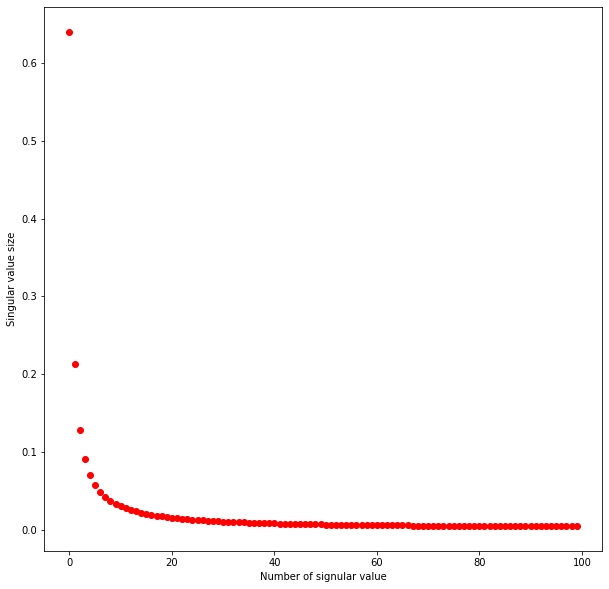

In [20]:
# This plots the singular values
diagonal = np.diagonal(sigma,)

plt.figure(figsize=(10,10))
plt.plot(diagonal, 'ro', markersize=6)
plt.xlabel("Number of signular value")
plt.ylabel("Singular value size")


plt.show()

np.allclose checks if the original matrix $A$ is equals to the $a1$ which is the singular value decomposition of $A$. This is the case, thus the singular value decomposition is correct. The above plot plots the singular values of the matrix $A$. 

The condition number of a matrix can be found a dividing the largest singular value by the smallest singular value. In this case $0.639 / 0.213 = 127.946.$ Because of this the problem is ill-conditioned and sensitive to errors which explains the errors in inversion.

## (d)
When solving the system using the SVD, the matrix $\Sigma^{-1} = 
\operatorname{diag}(\sigma_1^{-1}, \ldots, \sigma_n^{-1})$ is used. 
To **regularize** the problem the matrix $\Sigma^{-1}$ can be replaced by a matrix 
$$T = \operatorname{diag}(\sigma_1^{-1} , \ldots, \sigma_k^{-1}, 0, \ldots 0 ),$$
where $\sigma_j^{-1}$ is replaced by $0$ if $\sigma_j$ is smaller than a threshold $\alpha$. 

Implement a function `TruncatedSVDSolve(A, b, alpha)` that performs this procedure. 
Find a value of $\alpha$ such that the test signal $s$ is reconstructed reasonably well from the noisy data. Plot the result.

Explain that in the presence of noise, the result of `TruncatedSVDSolve(A, b, alpha)` can be more accurate than exact inversion.

In [23]:
# This implements the truncated SVD function
def TruncatedSVDSolve(A, b, alpha):
    
    # Create SVD
    U, s, Vh = la.svd(A)
    t = s
    
    
    for count, value in enumerate(s):
        if value <= alpha:
            t[count] = 0  
        else:
            t[count] = 1/value
    
    c = np.dot(U.T,b)
    w = np.dot(np.diag(t),c)
    x = np.dot(Vh.conj().T,w)
    return x

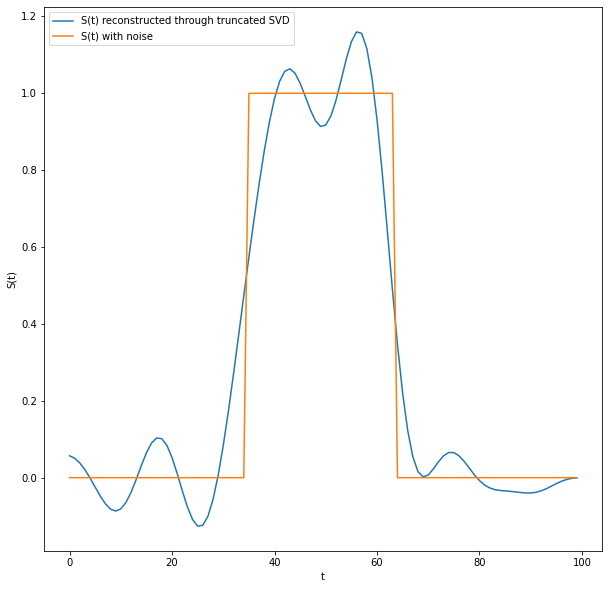

In [24]:
trunc = TruncatedSVDSolve(A, de, 0.02)

plt.figure(figsize=(10,10))
plt.plot(trunc, label = 'S(t) reconstructed through truncated SVD')
plt.plot(s_noise, label = 'S(t) with noise')
plt.xlabel("t")
plt.ylabel("S(t)")
plt.legend()
plt.show()

The above plot shows the S(t) as found in 2.b and S(t) reconstructed through truncated SVD. Through trial and error, an $\alpha = 0.02$ was chosen as it reasonably fit the original data.

In the presence of noise, the truncated singular value decomposition has more accurate results than exact inversion as by removing singular value, the condition number is decreased. This in turn makes the problem less sensitive to error and therefore gives more accurate results. It must be noted that by removing singular values, the original matrix $A$ cannot be obtained anymore.